<a href="https://colab.research.google.com/github/majorquev/DBDC_202206_Programacion_en_R_para_ciencia_de_datos/blob/main/Clase5/00_Ejemplos_adicionales_ggplot2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ejemplos adicionales ggplot2

**Autor:** Miguel Jorquera Viguera.<br>
**E-mail:** majorquev@gmail.com<br>
**Ayudante:** Rodrigo Morales<br>
**E-mail ayudante:** rumorale1@gmail.com

In [2]:
# install.packages("nycflights13")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
library(ggplot2)
library(dplyr)
library(nycflights13)


In [4]:
data(flights)

head(flights)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


## `stat_bin()`: Permite generar bines en la data y visualizar etiquetas entre otros elementos

1.- Creamos un histograma con 10 bins, y visualizaremos los conteos en etiquetas sobre cada barra del histograma. Para ello considerar a función `stat_bin` con parámetros `geom = 'label'`, y `mapping = aes(label=..count..)`.

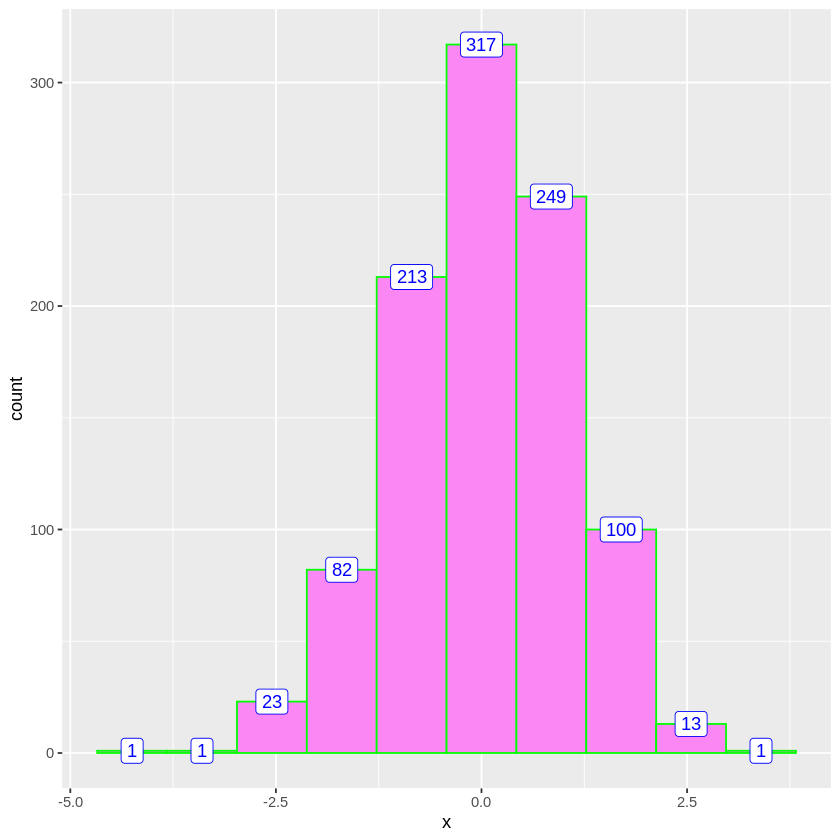

In [8]:
# Histograma de frecuencias absolutas
set.seed(15)
data <- data.frame(x = rnorm(1000))

data %>%
  ggplot() +
  aes(x = x) +
  geom_histogram(
    bins = 10,
    color = "green",
    fill = "#fa87f4"
  ) +
  stat_bin(
    bins = 10,
    geom = "label",
    mapping = aes(label = ..count..),
    #Opcional
    color = "blue",
    position = position_stack(vjust = 1)
  )




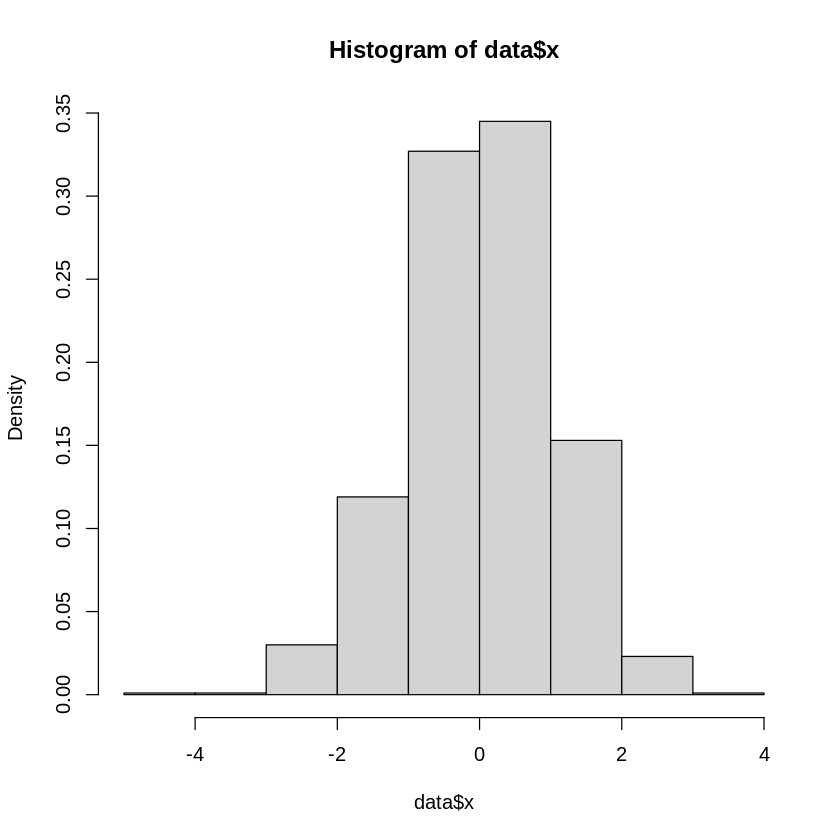

In [15]:
# NOTA: En R base
hist(data$x, freq = F, breaks = 10)

2.- Misma Visualización pero con histograma de frecuencias relativas.

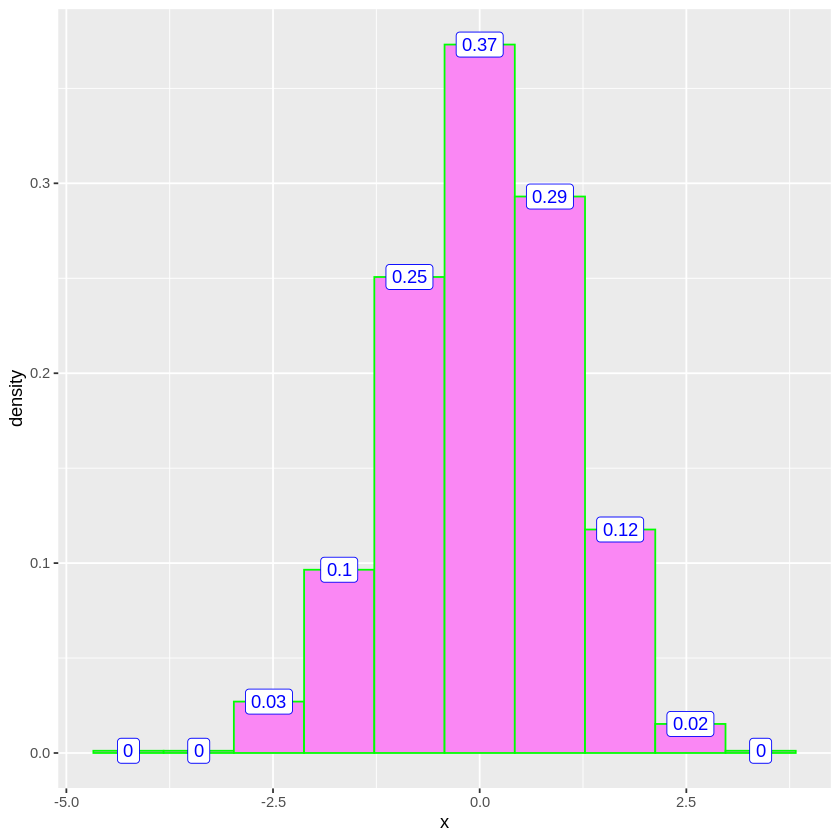

In [23]:
# Histograma de frecuencias relativas

# Adicionalmente, si se quiere mostrar el histograma de frecuencia --------
#  es lo mismo pero se añade y = ..density.. en el maepo estético del histograma

data %>%
  ggplot() +
  aes(x = x, y = ..density..) +
  geom_histogram(
    bins = 10,
    color = "green",
    fill = "#fa87f4"
  ) +
  stat_bin(
    bins = 10,
    geom = "label",
    mapping = aes(label = round(..density..,2) ),
    #Opcional
    color = "blue",
    position = position_stack(vjust = 1)
  )



In [19]:
round(3.1415192,2)

[1] 3.14

## `theme()`: Permite modificar diversos parámetros gráficos, en particualar la orientación de los ejes.

En este ejemplo consideraremos la data de vuelos, para o cual buscaremos visualizar la serie que contiene el total de vuelos por cada día hasta julio. 
Adicionalmente modificaremos la orientación de las etiquetas del eje X mediante la función `theme()`.

In [26]:
lubridate::month(as.Date("2022-07-21"))

[1] 7

In [30]:
as.Date("2022-07-21") > "2022-08-10"

[1] FALSE

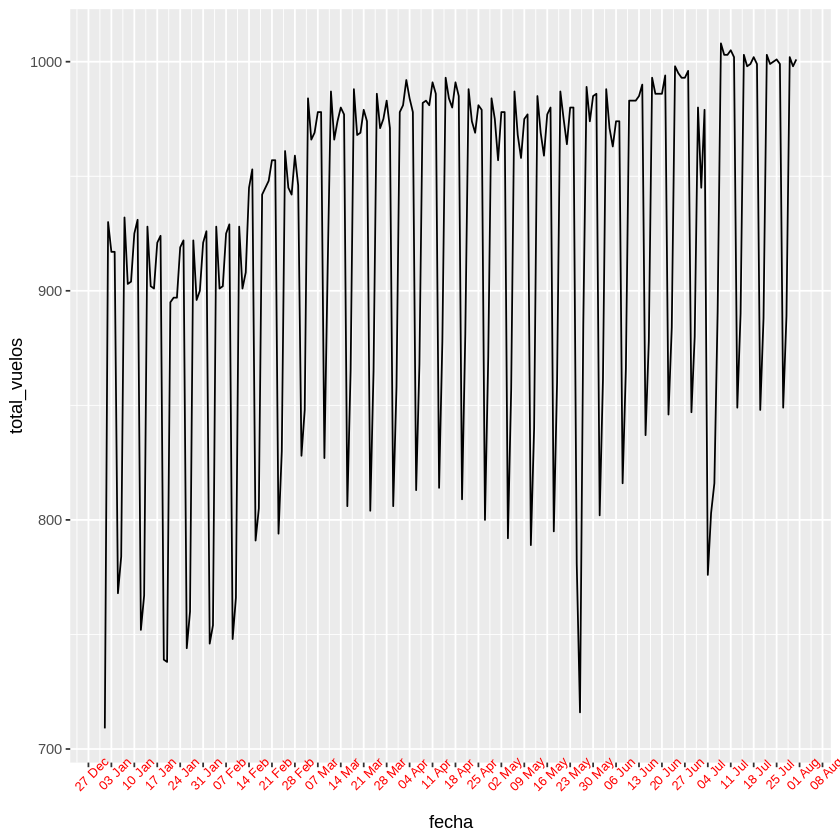

In [40]:

# Orientación etiquetas ejes ----------------------------------------------
data(flights)

# A modo de ejemplo podemos visulizar el total de vuelos por día .
flights %>%
  mutate(fecha = as.Date(time_hour)) %>%
  group_by(fecha) %>%
  summarise(total_vuelos = n()) %>%
  filter(fecha <= "2013-07-31") %>%
  ggplot() +
  aes(x = fecha, y = total_vuelos) + 
  geom_line() +
  scale_x_date(date_breaks = "7 day",date_labels = "%d %b") +
  theme(axis.text.x = element_text(size = 8, angle = 45, colour = "red") )

# La función element_text() permite modificar orientación, y ajste vertical y hoizontal


In [39]:
?element_text

## `geom_label()`: Al igual que `geom_text()`, permite añadir etiquetas en la visualización, sin la necesidad de generar manualmente los bins.

1.- Generar un dataframe que contenga la cantidad de vuelos por cada aeropuerto de  destino.

2.- Construir un gráfico de barras (con el dataset anterior), pero que sólo muestre los aeorpuertos de *destino* de ranking 1, 10 y 20 (según la cantidad de vuelos hacia ese destino)


In [41]:
data(flights)

In [43]:
resumen_dest <- flights %>%
  count(dest) %>%
  rename(total_vuelos = n)

In [47]:
resumen_dest %>%
  arrange(desc(total_vuelos)) %>%
  mutate(orden = row_number()) %>%
  filter(orden %in% c(1,10,20) )

dest,total_vuelos,orden
<chr>,<int>,<int>
ORD,17283,1
DCA,9705,10
LAS,5997,20


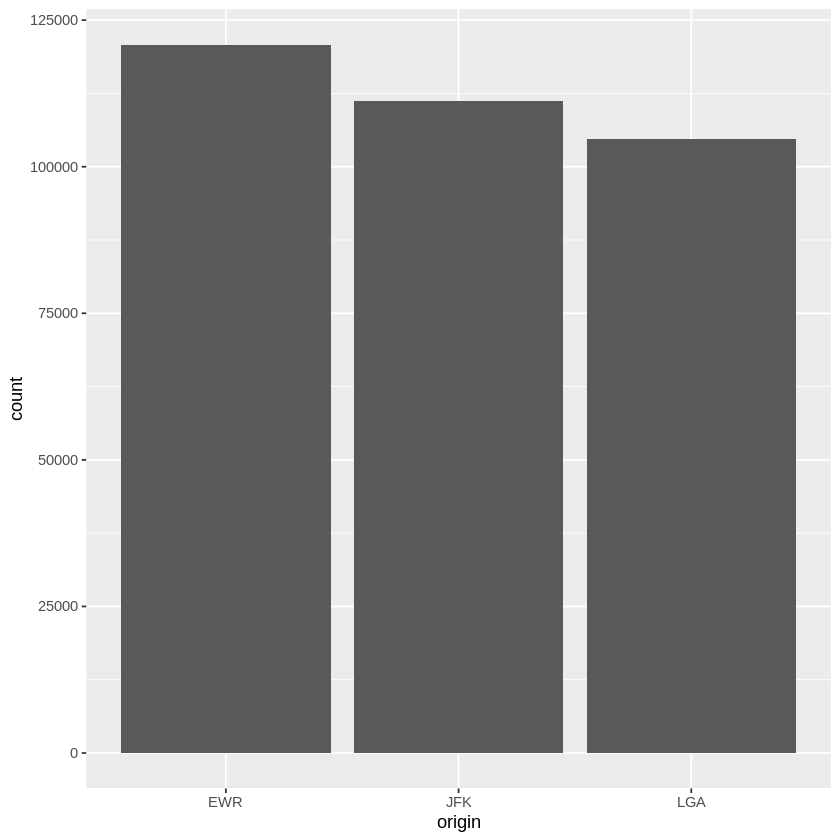

In [48]:
#NOTA (geom_bar)

flights %>%
  ggplot() +
  aes(origin) +
  geom_bar() # Por defecto R genera el conteo


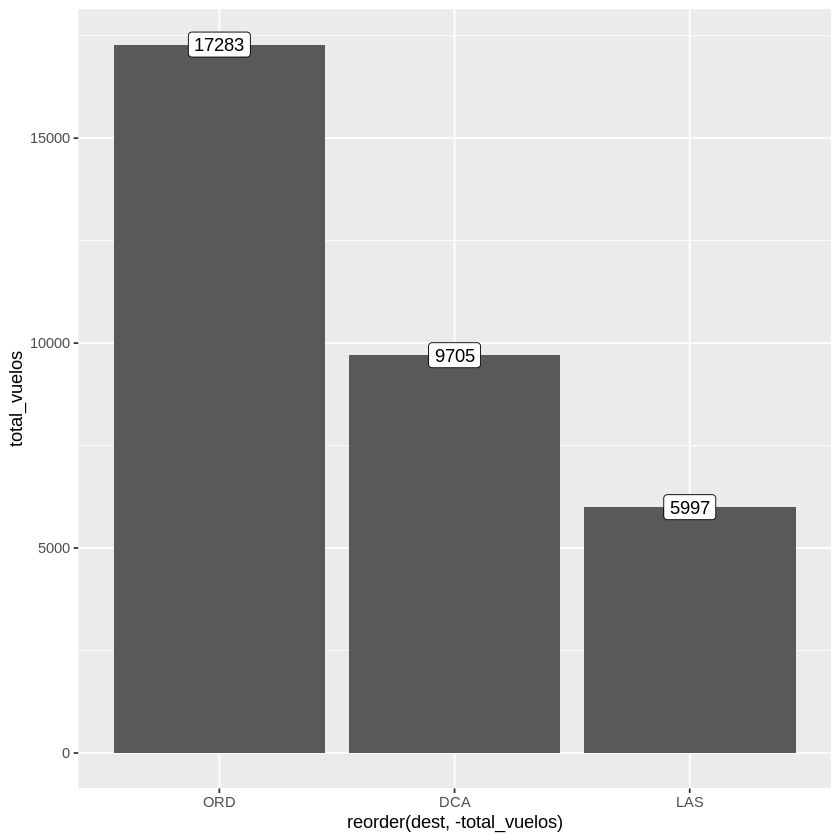

In [57]:
resumen_dest %>%
  arrange(desc(total_vuelos)) %>%
  mutate(orden = row_number()) %>%
  filter(orden %in% c(1,10,20) ) %>%
  ggplot() +
  aes(x = reorder(dest,-total_vuelos) , y = total_vuelos) + # Notar la función reorder para ordenar el eje X en función del total de vuelos.
  geom_bar(stat = "identity") +
  geom_label(aes(label = total_vuelos))